<a href="https://colab.research.google.com/github/RedaElmar/Sentiments_Analysis_Darija_Tweets/blob/main/Sentiments_Analysis_Darija_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import aaransia
import pandas as pd
from aaransia import transliterate, SourceLanguageError
import re
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import logging

In [2]:
# Load train
df = pd.read_csv('train.csv')
temp = pd.read_csv('dev.csv')
#merge train and dev
df = pd.concat([df, temp])
df['tweet'] = df['tweet'].astype(str) # One row has a float as the text
print(df.shape)
df.head()

(6077, 2)


,tweet,label
0,hhhhhhhhhhhhhhhhhhhhhh ana ga3ma sma3tt ach ka...,neutral
1,hhhh hardart jomhorha la fi3lan kadahko lach m...,neutral
2,: أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حا...,neutral
3,كان افظل حاكم عربي',positive
4,ماريانو راخوي : خاص المغرب واسبانيا يشرحو للرأ...,neutral


In [3]:
df.head()

,tweet,label
0,hhhhhhhhhhhhhhhhhhhhhh ana ga3ma sma3tt ach ka...,neutral
1,hhhh hardart jomhorha la fi3lan kadahko lach m...,neutral
2,: أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حا...,neutral
3,كان افظل حاكم عربي',positive
4,ماريانو راخوي : خاص المغرب واسبانيا يشرحو للرأ...,neutral


In [4]:
EMOTICONS = {
    u":)":"Happy face or smiley",u":D":"Happy face or smiley",    u"<3":"Happy face or smiley",    u":*":"Happy face or smiley",    u":p":"Happy face or smiley",    u":P":"Happy face or smiley",    u"xD":"Happy face or smiley",    u"XD":"Happy face or smiley",    u":â€‘\)":"Happy face or smiley",    u":\)":"Happy face or smiley",    u":-\]":"Happy face or smiley",    u":\]":"Happy face or smiley",    u":-3":"Happy face smiley",    u":3":"Happy face smiley",    u":->":"Happy face smiley",    u":>":"Happy face smiley",    u"8-\)":"Happy face smiley",    u":o\)":"Happy face smiley",    u":-\}":"Happy face smiley",    u":\}":"Happy face smiley",    u":-\)":"Happy face smiley",    u":c\)":"Happy face smiley",    u":\^\)":"Happy face smiley",    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",    u":â€‘D":"Laughing, big grin or laugh with glasses",    u":D":"Laughing, big grin or laugh with glasses",    u"8â€‘D":"Laughing, big grin or laugh with glasses",    u"8D":"Laughing, big grin or laugh with glasses",    u"Xâ€‘D":"Laughing, big grin or laugh with glasses",    u"XD":"Laughing, big grin or laugh with glasses",    u"=D":"Laughing, big grin or laugh with glasses",    u"=3":"Laughing, big grin or laugh with glasses",    u"B\^D":"Laughing, big grin or laugh with glasses",    u":-\)\)":"Very happy",    u":â€‘\(":"Frown, sad, andry or pouting",    u":-\(":"Frown, sad, andry or pouting",    u":\(":"Frown, sad, andry or pouting",    u":â€‘c":"Frown, sad, andry or pouting",   u":c":"Frown, sad, andry or pouting",   u":â€‘<":"Frown, sad, andry or pouting",    u":<":"Frown, sad, andry or pouting",    u":â€‘\[":"Frown, sad, andry or pouting",    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",    u">:\[":"Frown, sad, andry or pouting",  u":\{":"Frown, sad, andry or pouting",    u":@":"Frown, sad, andry or pouting",    u">:\(":"Frown, sad, andry or pouting",    u":'â€‘\(":"Crying",    u":'\(":"Crying",    u":'â€‘\)":"Tears of happiness",    u":'\)":"Tears of happiness",    u"Dâ€‘':":"Horror",    u"D:<":"Disgust",   u"D:":"Sadness",    u"D8":"Great dismay",    u"D;":"Great dismay",    u"D=":"Great dismay",    u"DX":"Great dismay",    u":â€‘O":"Surprise",   u":O":"Surprise",    u":â€‘o":"Surprise",    u":o":"Surprise",    u":-0":"Shock",    u"8â€‘0":"Yawn",    u">:O":"Yawn",
    u":-\*":"Kiss",    u":\*":"Kiss",    u":X":"Kiss",    u";â€‘\)":"Wink or smirk",    u";\)":"Wink or smirk",    u"\*-\)":"Wink or smirk",    u"\*\)":"Wink or smirk",    u";â€‘\]":"Wink or smirk",    u";\]":"Wink or smirk",    u";\^\)":"Wink or smirk",    u":â€‘,":"Wink or smirk",   u";D":"Wink or smirk",   u":â€‘P":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",  u"Xâ€‘P":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u":â€‘Ãž":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u":Ãž":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u":â€‘/":"Skeptical, annoyed, undecided, uneasy or hesitant",    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",    u":â€‘\|":"Straight face",    u":\|":"Straight face",    u":$":"Embarrassed or blushing",
    u":â€‘x":"Sealed lips or wearing braces or tongue-tied",    u":x":"Sealed lips or wearing braces or tongue-tied",    u":â€‘#":"Sealed lips or wearing braces or tongue-tied",    u":#":"Sealed lips or wearing braces or tongue-tied",    u":â€‘&":"Sealed lips or wearing braces or tongue-tied",    u":&":"Sealed lips or wearing braces or tongue-tied",    u"O:â€‘\)":"Angel, saint or innocent",    u"O:\)":"Angel, saint or innocent",    u"0:â€‘3":"Angel, saint or innocent",    u"0:3":"Angel, saint or innocent",    u"0:â€‘\)":"Angel, saint or innocent",    u"0:\)":"Angel, saint or innocent",    u":â€‘b":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u"0;\^\)":"Angel, saint or innocent",    u">:â€‘\)":"Evil or devilish",    u">:\)":"Evil or devilish",    u"\}:â€‘\)":"Evil or devilish",    u"\}:\)":"Evil or devilish",    u"3:â€‘\)":"Evil or devilish",    u"3:\)":"Evil or devilish",    u">;\)":"Evil or devilish",    u"\|;â€‘\)":"Cool",    u"\|â€‘O":"Bored",    u":â€‘J":"Tongue-in-cheek",    u"#â€‘\)":"Party all night",
    u"%â€‘\)":"Drunk or confused",    u"%\)":"Drunk or confused",    u":-###..":"Being sick",    u":###..":"Being sick",    u"<:â€‘\|":"Dump",    u"\(>_<\)":"Troubled",    u"\(>_<\)>":"Troubled",    u"\(';'\)":"Baby",    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",    u"\(~_~;\) \(ãƒ»\.ãƒ»;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",    u"\(-_-\)zzz":"Sleeping",    u"\(\^_-\)":"Wink",    u"\(\(\+_\+\)\)":"Confused",    u"\(\+o\+\)":"Confused",    u"\(o\|o\)":"Ultraman",    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",    u"\(\^O\^\)ï¼":"Joyful",    u"\(\^o\^\)ï¼":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",    u"\('_'\)":"Sad or Crying",    u"\(/_;\)":"Sad or Crying",    u"\(T_T\) \(;_;\)":"Sad or Crying",    u"\(;_;":"Sad of Crying",    u"\(;_:\)":"Sad or Crying",    u"\(;O;\)":"Sad or Crying",    u"\(:_;\)":"Sad or Crying",    u"\(ToT\)":"Sad or Crying",    u";_;":"Sad or Crying",    u";-;":"Sad or Crying",    u";n;":"Sad or Crying",    u";;":"Sad or Crying",    u"Q\.Q":"Sad or Crying",    u"T\.T":"Sad or Crying",    u"QQ":"Sad or Crying",    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",    u"\(-_-\)":"Shame",    u"\(ä¸€ä¸€\)":"Shame",    u"\(ï¼›ä¸€_ä¸€\)":"Shame",    u"\(=_=\)":"Tired",    u"\(=\^\Â·\^=\)":"cat",    u"\(=\^\Â·\Â·\^=\)":"cat",    u"=_\^= ":"cat",    u"\(\.\.\)":"Looking down",    u"\(\._\.\)":"Looking down",    u"\^m\^":"Giggling with hand covering mouth",    u"\(\ãƒ»\ãƒ»?":"Confusion",    u"\(?_?\)":"Confusion",    u">\^_\^<":"Normal Laugh",    u"<\^!\^>":"Normal Laugh",    u"\^/\^":"Normal Laugh",    u"\ï¼ˆ\*\^_\^\*ï¼‰" :"Normal Laugh",   u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",    u"\(^\^\)":"Normal Laugh",   u"\(\^\.\^\)":"Normal Laugh",    u"\(\^_\^\.\)":"Normal Laugh",    u"\(\^_\^\)":"Normal Laugh",    u"\(\^\^\)":"Normal Laugh",    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",    u"\(\^â€”\^\ï¼‰":"Normal Laugh",    u"\(#\^\.\^#\)":"Normal Laugh",   u"\ï¼ˆ\^â€”\^\ï¼‰":"Waving",   u"\(;_;\)/~~~":"Waving",    u"\(\^\.\^\)/~~~":"Waving",    u"\(-_-\)/~~~ \($\Â·\Â·\)/~~~":"Waving",    u"\(T_T\)/~~~":"Waving",    u"\(ToT\)/~~~":"Waving",    u"\(\*\^0\^\*\)":"Excited",    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",    u"\(\+_\+\) \(@_@\)":"Amazed",    u"\(\*\^\^\)v":"Laughing,Cheerful",    u"\(\^_\^\)v":"Laughing,Cheerful",    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",    u'\(-"-\)':"Worried",    u"\(ãƒ¼ãƒ¼;\)":"Worried",    u"\(\^0_0\^\)":"Eyeglasses",    u"\(\ï¼¾ï½–\ï¼¾\)":"Happy",   u"\(\ï¼¾ï½•\ï¼¾\)":"Happy",    u"\(\^\)o\(\^\)":"Happy",    u"\(\^O\^\)":"Happy",    u"\(\^o\^\)":"Happy",    u"\)\^o\^\(":"Happy",    u":O o_O":"Surprised",    u"o_0":"Surprised",    u"o\.O":"Surpised",    u"\(o\.o\)":"Surprised",    u"oO":"Surprised",    u"\(\*ï¿£mï¿£\)":"Dissatisfied", u"\(â€˜A`\)":"Snubbed or Deflated"
    }
    
emojitext=list(EMOTICONS.keys())
emojitext

[':)',
 ':D',
 '<3',
 ':*',
 ':p',
 ':P',
 'xD',
 'XD',
 ':â€‘\\)',
 ':\\)',
 ':-\\]',
 ':\\]',
 ':-3',
 ':3',
 ':->',
 ':>',
 '8-\\)',
 ':o\\)',
 ':-\\}',
 ':\\}',
 ':-\\)',
 ':c\\)',
 ':\\^\\)',
 '=\\]',
 '=\\)',
 ':â€‘D',
 '8â€‘D',
 '8D',
 'Xâ€‘D',
 '=D',
 '=3',
 'B\\^D',
 ':-\\)\\)',
 ':â€‘\\(',
 ':-\\(',
 ':\\(',
 ':â€‘c',
 ':c',
 ':â€‘<',
 ':<',
 ':â€‘\\[',
 ':\\[',
 ':-\\|\\|',
 '>:\\[',
 ':\\{',
 ':@',
 '>:\\(',
 ":'â€‘\\(",
 ":'\\(",
 ":'â€‘\\)",
 ":'\\)",
 "Dâ€‘':",
 'D:<',
 'D:',
 'D8',
 'D;',
 'D=',
 'DX',
 ':â€‘O',
 ':O',
 ':â€‘o',
 ':o',
 ':-0',
 '8â€‘0',
 '>:O',
 ':-\\*',
 ':\\*',
 ':X',
 ';â€‘\\)',
 ';\\)',
 '\\*-\\)',
 '\\*\\)',
 ';â€‘\\]',
 ';\\]',
 ';\\^\\)',
 ':â€‘,',
 ';D',
 ':â€‘P',
 'Xâ€‘P',
 'XP',
 ':â€‘Ãž',
 ':Ãž',
 ':b',
 'd:',
 '=p',
 '>:P',
 ':â€‘/',
 ':/',
 ':-[.]',
 '>:[(\\\\)]',
 '>:/',
 ':[(\\\\)]',
 '=/',
 '=[(\\\\)]',
 ':L',
 '=L',
 ':S',
 ':â€‘\\|',
 ':\\|',
 ':$',
 ':â€‘x',
 ':x',
 ':â€‘#',
 ':#',
 ':â€‘&',
 ':&',
 'O:â€‘\\)',
 'O:\\)',
 '0:â€‘3',
 '

In [5]:
!pip install emoji --upgrade
import emoji

def extract_emoji(string):
  decode   = string.encode().decode('utf-8')
  allchars = [str for str in decode]
  List     = [c for c in allchars if c in emoji.EMOJI_DATA]
  words= string.split(' ')
  List2    = [c for c in words if c in emojitext]
  return ' '.join(List+List2)
def remove_emoji(string):
  decode   = string.encode().decode('utf-8')
  allchars = [str for str in decode]
  List     = [c for c in allchars if c in emoji.EMOJI_DATA]
  filtred  = [str for str in decode.split() if not any(i in str for i in List)]
  text = ' '.join(filtred)
  words= text.split(' ')
  List2    = [c for c in words if c not in emojitext]
  return ' '.join(List2)
def removeDuplicates(s):
    if s!='':
            a=s[0]
            for i in s:
                if i != a[-1]:
                    a=a+i
            return  a
    else:
        return ''
def preProcessing(tweet):    
    tweet=re.sub(r"http\S+ | www\S+" , " ", tweet)
    tweet=re.sub(r"#" , "", tweet)
    tweet=re.sub(r'@\S+',' ',tweet)
    tweet=removeDuplicates(tweet)
    return tweet
import string
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
df['preprocessedtext'] = df['tweet'].apply(lambda x: preProcessing(x))
df['emojis']= df['preprocessedtext'].apply(lambda x: extract_emoji(x))
df['noemojitext'] = df['preprocessedtext'].apply(lambda x: remove_emoji(x))
df['arabictext'] = df['noemojitext'].apply(lambda x: transliterate(x, source='tn', target='ar', universal=True))
df['arabictext'] = df['arabictext'].apply(lambda x: remove_punct(x))


In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('arabic')   #all the stop words
def NoStop (txt):
  Q=[]         #checking for stop words
  a=txt.split(" ")
  for i in a:
    if i in stop or len(i)<=2:
       continue
    else:
      Q.append(i)
  return " ".join(Q)
df['NoStopWords'] = df['arabictext'].apply(NoStop)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mountasser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df.head(50)

,tweet,label,preprocessedtext,emojis,noemojitext,arabictext,NoStopWords
0,hhhhhhhhhhhhhhhhhhhhhh ana ga3ma sma3tt ach ka...,neutral,h ana ga3ma sma3t ach kant kat9ol kanrakaz ghi...,,h ana ga3ma sma3t ach kant kat9ol kanrakaz ghi...,ه انا ڭاعما سماعت اش كانت كاتقول كانراكاز غير ...,انا ڭاعما سماعت كانت كاتقول كانراكاز معا زينب ...
1,hhhh hardart jomhorha la fi3lan kadahko lach m...,neutral,h hardart jomhorha la fi3lan kadahko lach mrak...,,h hardart jomhorha la fi3lan kadahko lach mrak...,ه هاردارت جومهورها لا فيعلان كاداهكو لاش مراكز...,هاردارت جومهورها فيعلان كاداهكو لاش مراكزين مع...
2,: أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حا...,neutral,: أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حا...,,: أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حا...,اتفهم العثماني واتفهم الجدل الشعبي الحل حان و...,اتفهم العثماني واتفهم الجدل الشعبي الحل حان وق...
3,كان افظل حاكم عربي',positive,كان افظل حاكم عربي',,كان افظل حاكم عربي',كان افظل حاكم عربي,افظل حاكم عربي
4,ماريانو راخوي : خاص المغرب واسبانيا يشرحو للرأ...,neutral,ماريانو راخوي : خاص المغرب واسبانيا يشرحو لرأي...,,ماريانو راخوي : خاص المغرب واسبانيا يشرحو لرأي...,ماريانو راخوي خاص المغرب واسبانيا يشرحو لراي ...,ماريانو راخوي خاص المغرب واسبانيا يشرحو لراي ا...
5,كيف سمحت لك نفسك ان تقارن اردوغان بالحمار بنكي...,negative,كيف سمحت لك نفسك ان تقارن اردوغان بالحمار بنكي...,,كيف سمحت لك نفسك ان تقارن اردوغان بالحمار بنكي...,كيف سمحت لك نفسك ان تقارن اردوغان بالحمار بنكي...,سمحت نفسك تقارن اردوغان بالحمار بنكيران لتذكير...
6,مليلية.. رئيس حزب “بوكس” الإسباني اللي كيعادي ...,neutral,مليلية. رئيس حزب “بوكس” الإسباني الي كيعادي بل...,,مليلية. رئيس حزب “بوكس” الإسباني الي كيعادي بل...,مليلية رييس حزب “بوكس” الاسباني الي كيعادي بلا...,مليلية رييس حزب “بوكس” الاسباني الي كيعادي بلا...
7,dakchi alach hamdoulah mereta7 et en bonne san...,positive,dakchi alach hamdoulah mereta7 et en bone santé 😂,😂,dakchi alach hamdoulah mereta7 et en bone santé,داكشي الاش هامدولاه مرتاح ت ن بون سانت,داكشي الاش هامدولاه مرتاح بون سانت
8,تحياتي أستاذة منيب,positive,تحياتي أستاذة منيب,,تحياتي أستاذة منيب,تحياتي استاذة منيب,تحياتي استاذة منيب
9,"ولا انا متحزب ولكن حزب العدالة """""""""""""""" بنكيرا...",negative,"ولا انا متحزب ولكن حزب العدالة "" بنكيران"" أخبت...",,"ولا انا متحزب ولكن حزب العدالة "" بنكيران"" أخبت...",ولا انا متحزب ولكن حزب العدالة بنكيران اخبت خ...,انا متحزب حزب العدالة بنكيران اخبت خلق اله


In [8]:
!pip install emot
#Importing libraries
import re
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

In [9]:
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        escaped_emot = re.escape(emot)
        text = re.sub(rf'({escaped_emot})', " ".join(EMOTICONS_EMO[emot].replace(",","").split()), text)
    return text

def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, " ".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text

df['emojis'] = df['emojis'].apply(lambda x: x.upper())
df['emojis'] = df['emojis'].apply(convert_emoticons)
df['emojis'] = df['emojis'].apply(convert_emojis)

In [10]:
df['emojis']=df['emojis'].apply(lambda x : x.replace('_'," "))

In [11]:
df['emojis'].unique()

array(['', 'face with tears of joy', 'heart suit cherry blossom',
       'heart suit', 'dog', 'bird',
       'thinking face person shrugging female sign person shrugging female sign person shrugging female sign',
       'winking face grinning face with sweat',
       'folded hands fire pensive face yellow heart',
       'face with tears of joy loudly crying face face with tears of joy loudly crying face',
       'loudly crying face', 'grinning face with sweat',
       'face with steam from nose', 'revolving hearts',
       'smiling face with heart-eyes kissing face with closed eyes unamused face',
       'face with tears of joy face with medical mask face with tears of joy face with medical mask water pistol bomb person bowing',
       'glowing star sparkling heart', 'sleepy face',
       'smiling face with heart-eyes smiling face with smiling eyes',
       'musical notes', 'smiling face with heart-eyes', 'pensive face',
       'microphone musical note headphone speaker high volume',
 

In [12]:
df['final']=df['NoStopWords']+' '+df['emojis']

In [13]:
df.head(50)

,tweet,label,preprocessedtext,emojis,noemojitext,arabictext,NoStopWords,final
0,hhhhhhhhhhhhhhhhhhhhhh ana ga3ma sma3tt ach ka...,neutral,h ana ga3ma sma3t ach kant kat9ol kanrakaz ghi...,,h ana ga3ma sma3t ach kant kat9ol kanrakaz ghi...,ه انا ڭاعما سماعت اش كانت كاتقول كانراكاز غير ...,انا ڭاعما سماعت كانت كاتقول كانراكاز معا زينب ...,انا ڭاعما سماعت كانت كاتقول كانراكاز معا زينب ...
1,hhhh hardart jomhorha la fi3lan kadahko lach m...,neutral,h hardart jomhorha la fi3lan kadahko lach mrak...,,h hardart jomhorha la fi3lan kadahko lach mrak...,ه هاردارت جومهورها لا فيعلان كاداهكو لاش مراكز...,هاردارت جومهورها فيعلان كاداهكو لاش مراكزين مع...,هاردارت جومهورها فيعلان كاداهكو لاش مراكزين مع...
2,: أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حا...,neutral,: أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حا...,,: أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حا...,اتفهم العثماني واتفهم الجدل الشعبي الحل حان و...,اتفهم العثماني واتفهم الجدل الشعبي الحل حان وق...,اتفهم العثماني واتفهم الجدل الشعبي الحل حان وق...
3,كان افظل حاكم عربي',positive,كان افظل حاكم عربي',,كان افظل حاكم عربي',كان افظل حاكم عربي,افظل حاكم عربي,افظل حاكم عربي
4,ماريانو راخوي : خاص المغرب واسبانيا يشرحو للرأ...,neutral,ماريانو راخوي : خاص المغرب واسبانيا يشرحو لرأي...,,ماريانو راخوي : خاص المغرب واسبانيا يشرحو لرأي...,ماريانو راخوي خاص المغرب واسبانيا يشرحو لراي ...,ماريانو راخوي خاص المغرب واسبانيا يشرحو لراي ا...,ماريانو راخوي خاص المغرب واسبانيا يشرحو لراي ا...
5,كيف سمحت لك نفسك ان تقارن اردوغان بالحمار بنكي...,negative,كيف سمحت لك نفسك ان تقارن اردوغان بالحمار بنكي...,,كيف سمحت لك نفسك ان تقارن اردوغان بالحمار بنكي...,كيف سمحت لك نفسك ان تقارن اردوغان بالحمار بنكي...,سمحت نفسك تقارن اردوغان بالحمار بنكيران لتذكير...,سمحت نفسك تقارن اردوغان بالحمار بنكيران لتذكير...
6,مليلية.. رئيس حزب “بوكس” الإسباني اللي كيعادي ...,neutral,مليلية. رئيس حزب “بوكس” الإسباني الي كيعادي بل...,,مليلية. رئيس حزب “بوكس” الإسباني الي كيعادي بل...,مليلية رييس حزب “بوكس” الاسباني الي كيعادي بلا...,مليلية رييس حزب “بوكس” الاسباني الي كيعادي بلا...,مليلية رييس حزب “بوكس” الاسباني الي كيعادي بلا...
7,dakchi alach hamdoulah mereta7 et en bonne san...,positive,dakchi alach hamdoulah mereta7 et en bone santé 😂,face with tears of joy,dakchi alach hamdoulah mereta7 et en bone santé,داكشي الاش هامدولاه مرتاح ت ن بون سانت,داكشي الاش هامدولاه مرتاح بون سانت,داكشي الاش هامدولاه مرتاح بون سانت face with t...
8,تحياتي أستاذة منيب,positive,تحياتي أستاذة منيب,,تحياتي أستاذة منيب,تحياتي استاذة منيب,تحياتي استاذة منيب,تحياتي استاذة منيب
9,"ولا انا متحزب ولكن حزب العدالة """""""""""""""" بنكيرا...",negative,"ولا انا متحزب ولكن حزب العدالة "" بنكيران"" أخبت...",,"ولا انا متحزب ولكن حزب العدالة "" بنكيران"" أخبت...",ولا انا متحزب ولكن حزب العدالة بنكيران اخبت خ...,انا متحزب حزب العدالة بنكيران اخبت خلق اله,انا متحزب حزب العدالة بنكيران اخبت خلق اله


In [14]:
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from nltk.tokenize import regexp_tokenize 

def normalizer(sen):
    tokens=regexp_tokenize(sen, "[\w']+") #toknize words 
    return tokens

In [15]:
#for i in range(len(df['final'])):
#    try:
#        df['final'][i] = transliterate(df['final'][i], source='ar', target='ma')
#    except:
#        pass

In [16]:
df['final'].unique()

array(['انا ڭاعما سماعت كانت كاتقول كانراكاز معا زينب وياسمين وشيرين ',
       'هاردارت جومهورها فيعلان كاداهكو لاش مراكزين معاها اما كاين كايدير داكشي عالانان خبيت بهال بوهيلا ',
       'اتفهم العثماني واتفهم الجدل الشعبي الحل حان وقت تنزيل شامل لجهوية المتقدمة وتحمل المتخبين الجهوين لكامل صلاحياتهم لشرح تفا… ',
       ..., 'بنكيران كيتحكم فهدشي شعب مكلخ ',
       'اشمن ادافير ادافير اند رجالا اندهوم كتار دياول لعيالات ',
       'وايه باينا انا جابني لقدافي اهاهاه هينتاش كولشي تاي دوي علا تويتر ديك ساعا '],
      dtype=object)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=normalizer)),  # strings to token integer counts
    ('classifier', MultinomialNB()) # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(df['final'], df['label'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function normalizer at 0x7fd2a315ea60>)),
                ('classifier', MultinomialNB())])

In [18]:
pred_labels = pipeline.predict(df['final'])

In [19]:
#from sklearn.metrics import classification_report
#print(classification_report(df['label'], pred_labels))

In [20]:
df2 = pd.read_csv('test.csv')
df2['preprocessedtext'] = df2['tweet'].apply(lambda x: preProcessing(x))
df2['emojis']= df2['preprocessedtext'].apply(lambda x: extract_emoji(x))
df2['noemojitext'] = df2['preprocessedtext'].apply(lambda x: remove_emoji(x))
df2['arabictext'] = df2['noemojitext'].apply(lambda x: transliterate(x, source='tn', target='ar', universal=True))
df2['arabictext'] = df2['arabictext'].apply(lambda x: remove_punct(x))
df2['NoStopWords'] = df2['arabictext'].apply(NoStop)
df2['emojis']=df2['emojis'].apply(lambda x : x.upper())
df2['emojis']=df2['emojis'].apply(convert_emoticons)
df2['emojis']=df2['emojis'].apply(convert_emojis)
df2['emojis']=df2['emojis'].apply(lambda x : x.replace('_'," "))
df2['final']=df2['NoStopWords']+' '+df2['emojis']

In [21]:
for i in range(len(df2['final'])):
    try:
        df2['final'][i] = transliterate(df2['final'][i], source='ar', target='ma')
    except:
        pass

In [22]:
#df2['final']

In [23]:
pred_labels= pipeline.predict(df2['final'])

In [24]:
#create dataframe from df2['final'] and pred_labels
#df3 = pd.DataFrame({'tweet':df2['final'],'label':pred_labels})
#df3.head(30)

In [25]:
df2.head()

,tweet,label,preprocessedtext,emojis,noemojitext,arabictext,NoStopWords,final
0,Li baghi ideye3 weqto iji insahni ...,neutral,Li baghi ideye3 weqto iji insahni .,,Li baghi ideye3 weqto iji insahni .,لي باغي يديع وقتو يجي ينساهني,باغي يديع وقتو يجي ينساهني,baghy ydy3 oqto yjy ynsahny
1,@user machi anaaaa homa ligalo f tag wehda bay...,neutral,machi ana homa ligalo f tag wehda bayna mn fa...,,machi ana homa ligalo f tag wehda bayna mn fan...,ماشي انا هوما ليڭالو ف تاڭ وهدا باينا من فانس ...,ماشي انا هوما ليڭالو تاڭ وهدا باينا فانس رايان...,machy ana homa lygalo tag ohda bayna fans raya...
2,@user oui ana asslan ghir satellitaire li nawi...,neutral,oui ana aslan ghir satelitaire li nawi nkhdm,,oui ana aslan ghir satelitaire li nawi nkhdm,وي انا اسلان غير ساتليتاير لي ناوي نخدم,انا اسلان ساتليتاير ناوي نخدم,ana aslan satlytayr naoy nkhdm
3,زياش رجع للرسمية مع تشيلسي قبل ما يشار مع المغ...,neutral,زياش رجع لرسمية مع تشيلسي قبل ما يشار مع المغر...,,زياش رجع لرسمية مع تشيلسي قبل ما يشار مع المغر...,زياش رجع لرسمية مع تشيلسي قبل ما يشار مع المغر...,زياش لرسمية تشيلسي يشار المغرب فالمونديال وغاد...,zyach lrsmyt tchylsy ychar almghrb falmondyal ...
4,@user Masm3tuuch mzn hya kant kathdar liha 3la...,neutral,Masm3tuch mzn hya kant kathdar liha 3la chi h...,,Masm3tuch mzn hya kant kathdar liha 3la chi he...,ماسمعتوش مزن هيا كانت كاتهدار ليها علا شي هد د...,ماسمعتوش مزن كانت كاتهدار ليها علا دينا معاودا...,masm3toch mzn kant kathdar lyha 3la dyna m3aod...


In [26]:
from sklearn.metrics import classification_report
print(classification_report(df2['label'], pred_labels))

              precision    recall  f1-score   support

    negative       0.81      0.25      0.38        52
     neutral       0.92      1.00      0.95       943
    positive       0.97      0.58      0.72       116

    accuracy                           0.92      1111
   macro avg       0.90      0.61      0.69      1111
weighted avg       0.92      0.92      0.90      1111



In [27]:
df2.shape

(1111, 8)

In [28]:
x = input()
y = pipeline.predict([x])
print(y)

['neutral']


In [32]:
str(y[0])

'neutral'

In [29]:
x = "tfo 3la bnadem"
x = transliterate(x, source='ma', target='ar')
x

'تفو علا بنادم'

In [30]:
#ss = pd.read_csv('SampleSubmission.csv')
#ss['label'] = pred_labels
#ss.head()
#ss.to_csv('Sub7.csv', index=False)

#After submittig the output to Zindi Plateform for validation
#**F1 Score =**

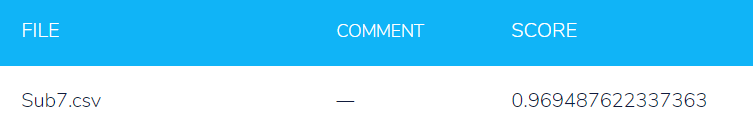